<b><center><font color= 'bROWN' style = 'font-family: Roboto Slab ; font-size:25px'>IPL Winner Probability Predictor </font></center></b><br>
<hr style="color: Teal; height: 1px;">
<font color= '#067F7D' style = 'font-family:cambria ; font-size:25px'>Problem Statement </font>

##  Project Purpose:
The purpose of this project is to predict the outcomes of IPL cricket matches based on historical match data. This analysis will help cricket enthusiasts and analysts gain insights into the factors that influence match results.

##  Data Used:
- **Matches Data (`matches.csv`):**
  Contains information about IPL matches including teams, venues, match results, and conditions.
<br>
- **Deliveries Data (`deliveries.csv`):**
  Detailed data on each ball delivered in IPL matches, including runs scored, wickets taken, and more.

## Data Preprocessing:
- Cleaned and prepared the data by handling missing values, filtering irrelevant rows (e.g., matches with rain interruptions), and ensuring consistency in team names.

## Feature Engineering:
- Extracted relevant features for predictive modeling:
  - Batting team
  - Bowling team
  - City
  - Runs left
  - Balls left
  - Wickets
  - Total runs
  - Current run rate (CRR)
  - Required run rate (RRR)

## Model Building:
- Utilized Logistic Regression as the predictive model due to its interpretability and effectiveness for binary classification tasks.
- Applied one-hot encoding to categorical features (batting team, bowling team, city) using a ColumnTransformer in a pipeline to preprocess data for model training.

## Model Training and Evaluation:
- Split the data into training and testing sets.
- Trained the Logistic Regression model on the training data.
- Evaluated model accuracy using the test set to assess its performance in predicting match outcomes.



# <b><font color='teal'> Step 1 : Understanding And Exploration </font></b>

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score

In [2]:
# reading data
match= pd.read_csv("matches.csv")
delivery=pd.read_csv('deliveries.csv')

In [3]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
# checking the shape of match
match.shape

(756, 18)

In [5]:
# checking the shape of delivery
delivery.shape

(179078, 21)

In [6]:
delivery.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN



## <b><font color='BROWN'>Step 2:Data Preproccessing And Preparation </font></b>

In [7]:
# so basically we need a total runs scored by each team 
total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

C:\Users\zebaf\AppData\Local\Temp\ipykernel_13452\205003029.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


In [8]:
# we need only 1st inning score which is going to chase
total_score_df=total_score_df[total_score_df['inning']==1]

In [9]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [10]:
# we are merging this total runs column to match data 
match_df=match.merge(total_score_df[["match_id","total_runs"]],left_on="id",right_on="match_id")

In [11]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [12]:
# writing only those teams which are actually playing
teams=[
    'Sunrisers Hyderabad', 'Mumbai Indians',
        'Royal Challengers Bangalore',
       'Kolkata Knight Riders',
        'Kings XI Punjab',
       'Chennai Super Kings', 
         'Rajasthan Royals', 
       'Delhi Capitals']


In [13]:
# replacing the same team of delhi
match_df['team1']=match_df['team1'].str.replace("Delhi Daredevils",'Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace("Delhi Daredevils",'Delhi Capitals')

In [14]:
match_df['team1']=match_df['team1'].str.replace("Deccan Chargers","Sunrisers Hyderabad")
match_df['team2']=match_df['team2'].str.replace("Deccan Chargers","Sunrisers Hyderabad")

In [15]:
# eliminating other not playing teams 
match_df=match_df[match_df['team1'].isin(teams)]
match_df=match_df[match_df['team2'].isin(teams)]

In [16]:
match_df.shape

(641, 20)

In [17]:
# i want only those matches which are played and not wanted that matches which are stopped due to 
# rain stoppage
match_df=match_df[match_df['dl_applied']==0]

In [18]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [19]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158


In [20]:
match_df=match_df[['match_id','city','winner','total_runs']]

In [21]:
# here we merging match_df to delivery_df
delivery_df=match_df.merge(delivery,on='match_id')

In [22]:
# only taking 2nd inning game on that we have to predict
delivery_df=delivery_df[delivery_df['inning']==2]

In [23]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [24]:
# current score can be obtained by adding every run for every ball so we use cumulative 
delivery_df['current_score']=delivery_df.groupby('match_id').cumsum()['total_runs_y']

C:\Users\zebaf\AppData\Local\Temp\ipykernel_13452\1875258830.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df['current_score']=delivery_df.groupby('match_id').cumsum()['total_runs_y']


In [25]:
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1


In [26]:
# for runs left we can subtract total runs - current scores
delivery_df['runs_left']=delivery_df['total_runs_x']- delivery_df['current_score']

In [27]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,206
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,204
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,200


In [28]:
# we have to chase one extra run 
delivery_df['total_runs_x']=delivery_df['total_runs_x']+1

In [29]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,206
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,204
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,1,0,1,NaN,NaN,NaN,152,0
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,2,0,2,NaN,NaN,NaN,154,-2
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-3
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,2,0,2,NaN,NaN,NaN,157,-5


In [30]:
# balls left
delivery_df['balls_left']=126-(delivery_df['over']*6+delivery_df['ball'])

In [31]:
delivery_df.head(3)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117


In [32]:
# so we want wickets and we have player dismissed so first we convert it into numeric and 
# apply group by fun and add all wickets and at last for wicket column we subtract 10-wickets 

In [33]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna('0')

In [34]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x:x if x=='0' else '1')

In [35]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].astype("int")

In [36]:
wickets=delivery_df.groupby('match_id').cumsum()['player_dismissed'].values

C:\Users\zebaf\AppData\Local\Temp\ipykernel_13452\1035948897.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets=delivery_df.groupby('match_id').cumsum()['player_dismissed'].values


In [37]:
delivery_df['wickets']=10-wickets

In [38]:
delivery_df.head(3)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10


In [39]:
# we want now current runrate(crr) and required runrate(rrr)

In [40]:
# crr-runs/overs
delivery_df['crr']=(delivery_df["current_score"]*6)/(120-delivery_df['balls_left'])

In [41]:
# rrr- runsleft/over lefts
delivery_df['rrr']=(delivery_df['runs_left']*6)/delivery_df['balls_left']

In [42]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,206,119,10,6.0,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,206,118,10,3.0,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,206,117,10,2.0,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,204,116,10,4.5,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,200,115,10,8.4,10.434783


In [43]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

In [44]:
delivery_df['result']=delivery_df.apply(result,axis=1)

In [45]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,206,119,10,6.0,10.386555,0
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,206,118,10,3.0,10.474576,0
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,206,117,10,2.0,10.564103,0
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,204,116,10,4.5,10.551724,0
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,200,115,10,8.4,10.434783,0


In [46]:
final_df=delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [47]:
# to shuffle data
final_df.sample(final_df.shape[0])

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
37882,Kings XI Punjab,Rajasthan Royals,Chandigarh,75,53,7,184,9.671642,8.490566,0
82319,Sunrisers Hyderabad,Chennai Super Kings,Hyderabad,136,54,5,224,7.909091,15.111111,0
35247,Kolkata Knight Riders,Chennai Super Kings,Kolkata,91,51,4,165,6.347826,10.705882,0
60558,Rajasthan Royals,Mumbai Indians,Mumbai,189,109,8,198,4.363636,10.403670,0
15235,Kings XI Punjab,Royal Challengers Bangalore,Chandigarh,52,53,9,144,8.149254,5.886792,1
...,...,...,...,...,...,...,...,...,...,...
92000,Rajasthan Royals,Delhi Daredevils,Delhi,48,38,8,153,7.609756,7.578947,1
147374,Sunrisers Hyderabad,Mumbai Indians,Mumbai,86,55,7,171,7.753846,9.381818,0
72675,Mumbai Indians,Royal Challengers Bangalore,Bangalore,113,81,10,157,6.615385,8.370370,0
44763,Delhi Daredevils,Mumbai Indians,Mumbai,41,1,3,184,7.159664,246.000000,0


In [48]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
100625,Kolkata Knight Riders,Kings XI Punjab,Bangalore,173,104,9,200,9.75,9.980769,1


In [49]:
final_df.isnull().sum()

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets           0
total_runs_x      0
crr               0
rrr               7
result            0
dtype: int64

In [50]:
# we are removing null values
final_df.dropna(inplace=True)

C:\Users\zebaf\AppData\Local\Temp\ipykernel_13452\2557089939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


In [51]:
# and we are removing the 0 ball left row
final_df=final_df[final_df["balls_left"]!=0]

# <b><font color='BROWN'>Step:3 Data Visualisation </font></b>

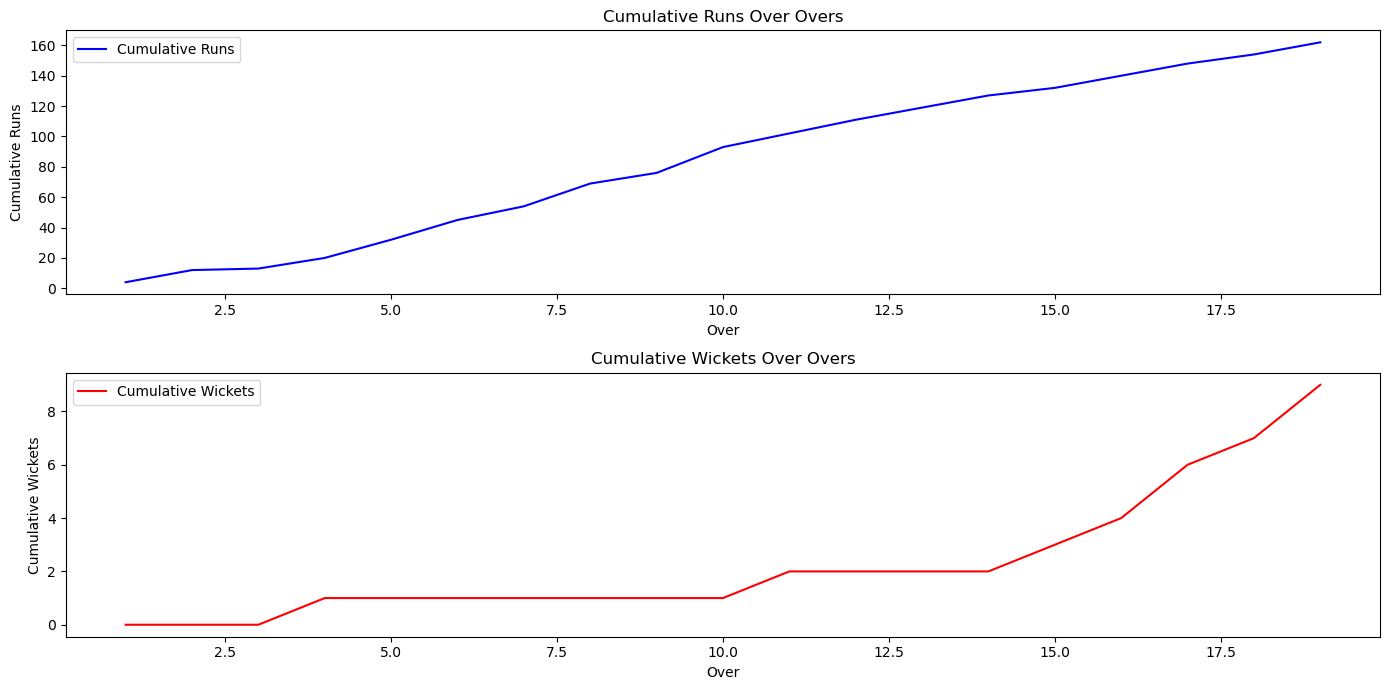

In [52]:
# Visualizing cumulative runs and wickets
match_id = 74  # Choose a match_id to visualize

match_data = delivery_df[delivery_df['match_id'] == match_id]
match_data = match_data[(match_data['ball'] == 6)]  # Only consider end of overs

# Plot cumulative runs and wickets over overs
plt.figure(figsize=(14, 7))

# Cumulative runs
plt.subplot(2, 1, 1)
plt.plot(match_data['over'], match_data['current_score'], label='Cumulative Runs', color='blue')
plt.title('Cumulative Runs Over Overs')
plt.xlabel('Over')
plt.ylabel('Cumulative Runs')
plt.legend()

# Cumulative wickets
plt.subplot(2, 1, 2)
plt.plot(match_data['over'], 10 - match_data['wickets'], label='Cumulative Wickets', color='red')
plt.title('Cumulative Wickets Over Overs')
plt.xlabel('Over')
plt.ylabel('Cumulative Wickets')
plt.legend()

plt.tight_layout()
plt.show()

In [53]:
final_df.groupby('batting_team')['total_runs_x'].sum().reset_index()

,batting_team,total_runs_x
0,Chennai Super Kings,1372175
1,Deccan Chargers,597921
2,Delhi Capitals,202149
3,Delhi Daredevils,1444014
4,Kings XI Punjab,1493720
5,Kolkata Knight Riders,1566227
6,Mumbai Indians,1475029
7,Rajasthan Royals,1387451
8,Royal Challengers Bangalore,1622337
9,Sunrisers Hyderabad,733612


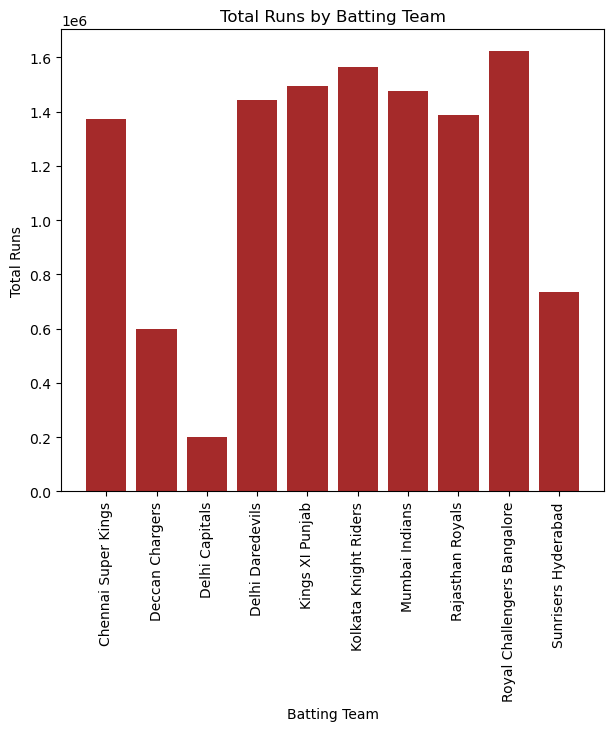

In [54]:
# Bar plot for total runs by each batting team
batting_team_runs = final_df.groupby('batting_team')['total_runs_x'].sum().reset_index()

plt.figure(figsize=(7,6))
plt.bar(batting_team_runs['batting_team'], batting_team_runs['total_runs_x'], color='brown')
plt.title('Total Runs by Batting Team')
plt.xlabel('Batting Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=90)
plt.show()

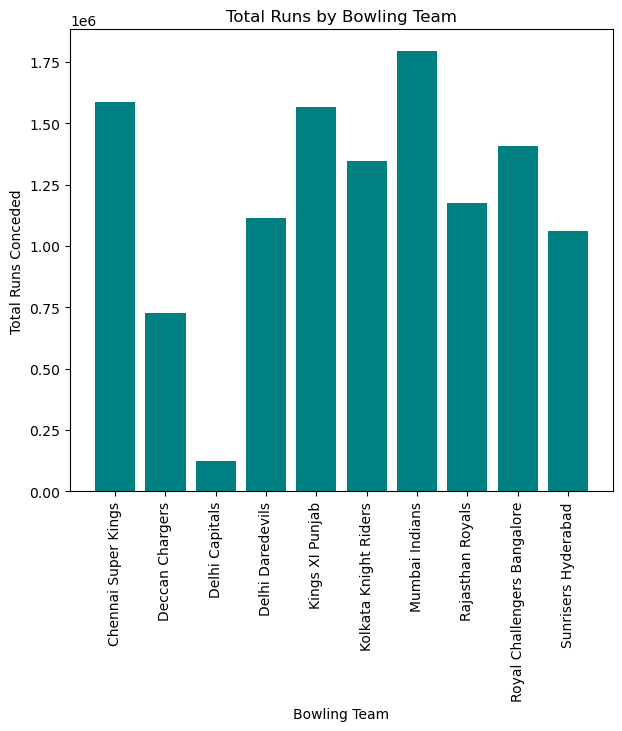

In [55]:
# Bar plot for total runs by each bowling team
bowling_team_runs = final_df.groupby('bowling_team')['total_runs_x'].sum().reset_index()

plt.figure(figsize=(7,6))
plt.bar(bowling_team_runs['bowling_team'], bowling_team_runs['total_runs_x'], color='teal')
plt.title('Total Runs by Bowling Team')
plt.xlabel('Bowling Team')
plt.ylabel('Total Runs Conceded')
plt.xticks(rotation=90)
plt.show()

C:\Users\zebaf\AppData\Local\Temp\ipykernel_13452\2431323526.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = final_df.corr()


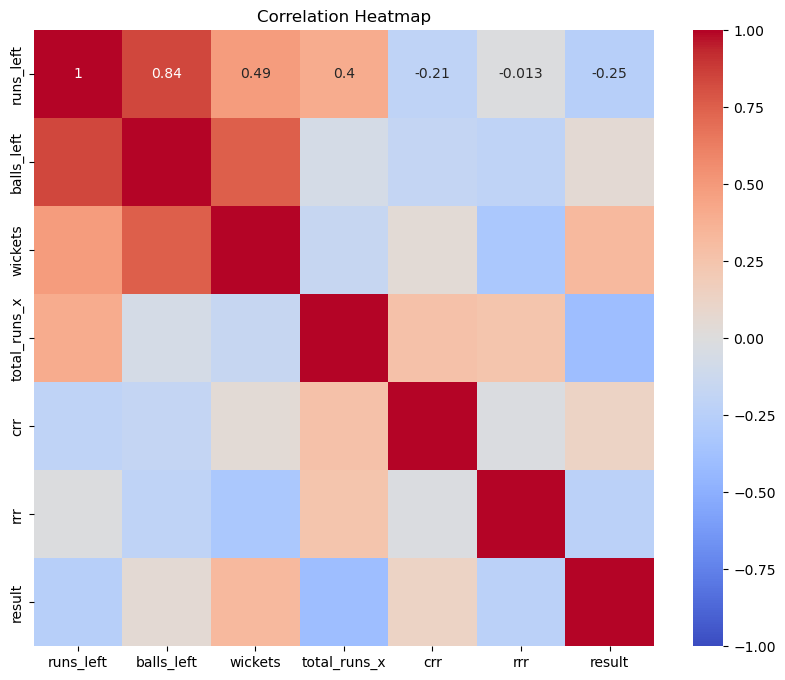

In [56]:
plt.figure(figsize=(10,8))
corr_matrix = final_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# <b><font color='teal'>Step 4 : Training Data </font></b>

### - Now all the preproccesing and visualisations is completed now we have to train the model

In [57]:
# train test split
X=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

In [58]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
92686,Chennai Super Kings,Delhi Daredevils,Delhi,130,87,10,179,8.727273,8.965517
110119,Rajasthan Royals,Sunrisers Hyderabad,Mumbai,156,75,8,202,6.000000,12.480000
139880,Sunrisers Hyderabad,Mumbai Indians,Hyderabad,56,29,5,143,5.670330,11.586207
1409,Kolkata Knight Riders,Kings XI Punjab,Kolkata,40,46,8,171,10.540541,5.217391
134953,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata,73,54,7,180,9.636364,8.111111
...,...,...,...,...,...,...,...,...,...
26022,Royal Challengers Bangalore,Mumbai Indians,Johannesburg,33,32,9,150,7.909091,6.187500
13781,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata,106,94,9,130,5.307692,6.765957
45163,Royal Challengers Bangalore,Rajasthan Royals,Jaipur,28,56,7,131,9.562500,3.000000
125333,Rajasthan Royals,Chennai Super Kings,Pune,87,33,4,211,8.482759,15.818182


In [59]:
# one-hot-encoding by using column transformer
trfm=ColumnTransformer([('trfm',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team',"city"])],remainder='passthrough')

In [60]:
pipe=Pipeline(steps=[
    ('step 1',trfm),
    ('step 2',LogisticRegression(solver='liblinear'))
])

In [61]:
pipe.fit(X_train,y_train)

C:\Users\zebaf\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step 1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trfm',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step 2', LogisticRegression(solver='liblinear'))])

# <b><font color='brown'>Step 4 : Prediction </font></b>

In [62]:
y_pred=pipe.predict(X_test)

In [63]:
# accuracy score
accuracy_score(y_test,y_pred)

0.8042609853528628

- If we use random forest it give miore accuracy but we need a probablities we need a smooth one


In [64]:
pipe.predict_proba(X_test)[12]

array([0.48807442, 0.51192558])

In [65]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [66]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [67]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 179


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,5,0,55.9,44.1
10467,2,8,0,50.5,49.5
10473,3,1,0,57.5,42.5
10479,4,7,1,69.1,30.9
10485,5,12,0,58.9,41.1
10491,6,13,0,46.5,53.5
10497,7,9,0,40.7,59.3
10505,8,15,0,27.0,73.0
10511,9,7,0,24.9,75.1
10518,10,17,0,13.6,86.4


Text(0.5, 1.0, 'Target-179')

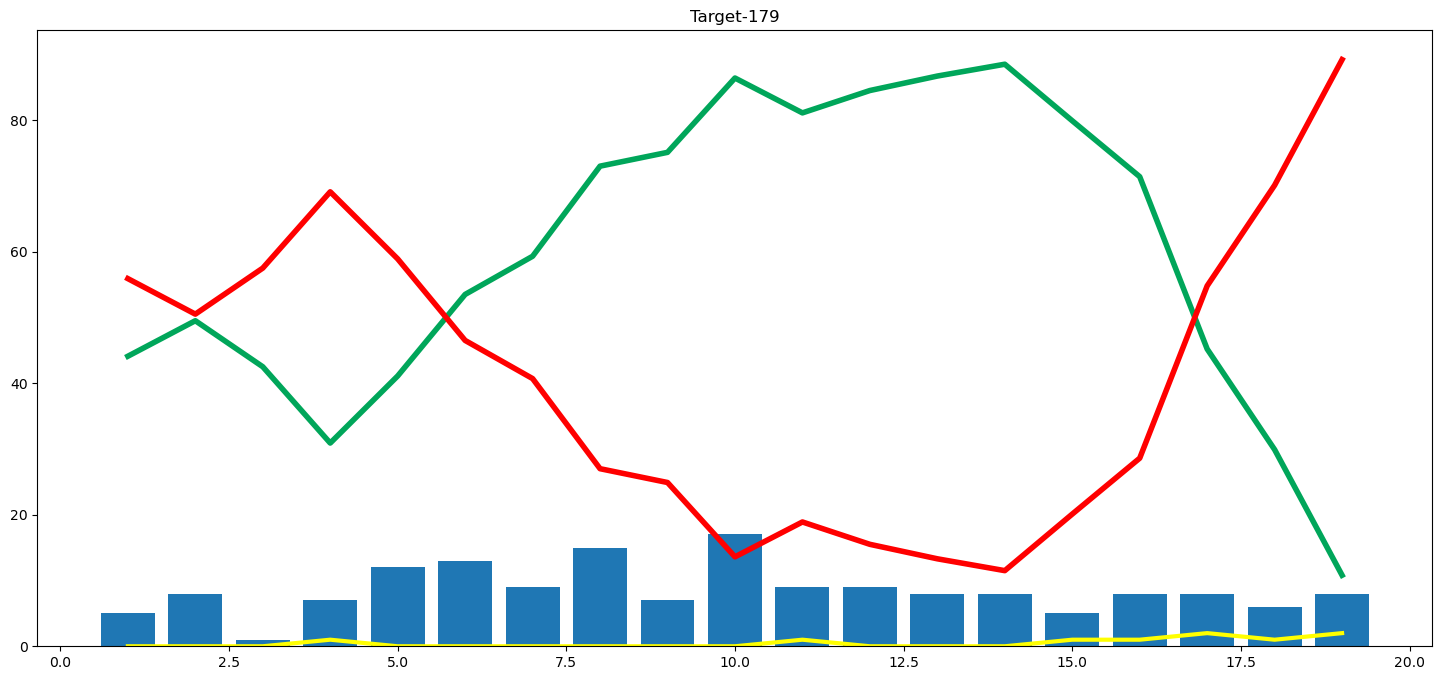

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [69]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [70]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [71]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

<font color= 'teal' style = 'font-family:Cambria ; font-size:30px'><b> OVERVIEW : </b> </font><br>


## Team Consistency:



- <font color= 'brown' style = 'font-family:Cambria ; font-size:18px'>Teams like 'Delhi Daredevils' were renamed to 'Delhi Capitals', and 'Deccan Chargers' to 'Sunrisers Hyderabad', ensuring data consistency. </font><br>
-  <font color= 'brown' style = 'font-family:Cambria ; font-size:18px'>
Non-participating teams were filtered out, focusing the analysis on current teams. 
</font>
## Match Conditions:
- <font color= 'brown' style = 'font-family:Cambria ; font-size:18px'>Matches affected by rain (where Duckworth-Lewis method was applied) were excluded from the analysis to maintain consistency and accuracy in match outcomes. </font><br>
## Score Aggregation:
- <font color= 'brown' style = 'font-family:Cambria ; font-size:18px'>The total runs scored in the first inning were calculated for each match.font><br>
-  <font color= 'brown' style = 'font-family:Cambria ; font-size:18px'>
This total was then merged with the match data to provide a target for the second inning.
</font> <br>
## Model Training:
- <font color= 'brown' style = 'font-family:Cambria ; font-size:18px'>The data was split into training and testing sets, and a logistic regression model was trained using a pipeline that included one-hot encoding of categorical features and logistic regression.</font><br>
-  <font color= 'brown' style = 'font-family:Cambria ; font-size:18px'>
The model predicts the probability of the batting team winning the match.
</font> 


<font color= 'teal' style = 'font-family:Cambria ; font-size:30px'><b>Conclusion : </b> </font><br>

## Data Preprocessing:
- <font color= 'brown' style = 'font-family:Cambria ; font-size:18px'>Ensured that the data was clean, consistent, and relevant to the analysis.</font><br>
-  <font color= 'brown' style = 'font-family:Cambria ; font-size:18px'>
Handled missing values and removed irrelevant rows (e.g., matches with zero balls left).
</font> <br>
## Model Accuracy:
- <font color= 'brown' style = 'font-family:Cambria ; font-size:18px'>The accuracy of the logistic regression model was evaluated, indicating how well it predicts the match outcome based on the features.</font><br>
- <font color= 'brown' style = 'font-family:Cambria ; font-size:18px'>`ACCURACY:0.80`</font><br>

## Feature Importance:
-  <font color= 'brown' style = 'font-family:Cambria ; font-size:18px'>
Features like batting team, bowling team, city, runs left, balls left, wickets left, total runs, current run rate, and required run rate are crucial for predicting the match outcome.
</font> 
           


In [72]:
# down we have overview for the app in pycharm

<b><center><font color= 'teal' style = 'font-family: cambria; font-size:25px'>Overview of App</font></center></b>
<hr style="color: Teal; height: 1px;">


<font color='black'>

**IPL Win Predictor App**

</font>

<font color='teal'>

### Purpose:

</font>

The IPL Win Predictor app is designed to predict the probability of winning or losing an IPL cricket match based on various match conditions and team performance metrics.

<font color='teal'>

### Functionality:

</font>

<font color='teal'>

#### Inputs:

</font>

- Selection of the batting and bowling teams.
- Host city of the match.
- Target score set by the batting team.
- Current score, overs completed, and wickets fallen.

<font color='teal'>

#### Calculations:

</font>

- Calculates balls left, runs required, remaining wickets, current run rate (CRR), and required run rate (RRR).

<font color='teal'>

#### Prediction:

</font>

- Utilizes a pre-trained machine learning model (Logistic Regression in this case) to predict the probability of each team winning or losing based on the provided inputs.

<font color='teal'>

### Usage:

</font>

- **Select Teams:** Choose the batting and bowling teams from the dropdown menus.
- **City Selection:** Select the host city where the match will be played.
- **Target and Current Score:** Enter the target score and current score of the batting team.
- **Overs and Wickets:** Enter the number of overs completed and wickets fallen.
- **Prediction:** Click on the "Predict Probability" button to see the predicted probabilities of each team winning or losing the match.

<font color='teal'>

### Example Output:

</font>

- Displays the predicted probability of the batting team winning and the bowling team losing.

<font color='red'>

### ***Imp Note:

</font>

-  <font color= 'brown' style = 'font-family:Cambria ; font-size:18px'>
 Ensure the correct version of `scikit-learn (1.3.1)` is used to maintain compatibility with the model.
</font></br>
-  <font color= 'brown' style = 'font-family:Cambria ; font-size:18px'>
To access the app, please navigate to the 'app.py' file provided by me and run it using the command 'streamlit run app.py
</font> 
</br>


This app provides a quick and intuitive way to estimate match outcomes based on real-time match conditions and historical data.
